# Identify Potential Fast Transients

Author: Melissa Graham & Midori Rollins

Identify potential fast transients from the "good" candidates created for all of the DDF.

To do this, we make simple cuts on the the time spans, peak magnitudes, amplitudes, rise slopes and rise times.

Write the list of potential fast transients to `potential_fast_transients_list.txt`.

Save the plot of every potential fast transient lightcurve in the folder `all_potential_fast_transients_plots/`.

## Set up and read in data

Import packages.

In [1]:
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import time

from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
cosmo = FlatLambdaCDM(H0=70 * u.km / u.s / u.Mpc, Tcmb0=2.725 * u.K, Om0=0.3)

Colors to use for plotting.

In [2]:
all_filters = ['g','r','i']
all_fcolors = ['green','red','blue']
all_fshapes = ['o','s','^']
all_fsizes  = [5, 5, 7]

Read in nightly-epoch candidate light curves, light curve parameters, and nightly-epoch limiting magnitudes.

In [3]:
fnm = '../all_nightly_epochs_files/candidate_lightcurves.dat'
candLC_field = np.loadtxt(fnm, dtype='str', usecols=(0))
candLC_candid = np.loadtxt(fnm, dtype='str', usecols=(1))
candLC_caldate = np.loadtxt(fnm, dtype='str', usecols=(2))
candLC_mjd = np.loadtxt(fnm, dtype='float', usecols=(3))
candLC_filter = np.loadtxt(fnm, dtype='str', usecols=(4))
candLC_Nobj = np.loadtxt(fnm, dtype='int', usecols=(5))
candLC_mag = np.loadtxt(fnm, dtype='float', usecols=(6))
candLC_mage = np.loadtxt(fnm, dtype='float', usecols=(7))
candLC_mrb = np.loadtxt(fnm, dtype='float', usecols=(8))
candLC_lef = np.loadtxt(fnm, dtype='float', usecols=(9))
del fnm

In [4]:
fnm = '../all_nightly_epochs_files/candidate_lightcurve_parameters.dat'
paramLC_field = np.loadtxt( fnm, dtype='str', usecols=(0) )
paramLC_candid = np.loadtxt( fnm, dtype='str', usecols=(1) )
paramLC_tspan = np.loadtxt( fnm, dtype='float', usecols=(2) )
paramLC_tspan_g = np.loadtxt( fnm, dtype='float', usecols=(3) )
paramLC_tspan_r = np.loadtxt( fnm, dtype='float', usecols=(4) )
paramLC_tspan_i = np.loadtxt( fnm, dtype='float', usecols=(5) )
paramLC_minmag = np.loadtxt( fnm, dtype='float', usecols=(6) )
paramLC_minmag_g = np.loadtxt( fnm, dtype='float', usecols=(7) )
paramLC_minmag_r = np.loadtxt( fnm, dtype='float', usecols=(8) )
paramLC_minmag_i = np.loadtxt( fnm, dtype='float', usecols=(9) )
paramLC_amp = np.loadtxt( fnm, dtype='float', usecols=(10) )
paramLC_amp_g = np.loadtxt( fnm, dtype='float', usecols=(11) )
paramLC_amp_r = np.loadtxt( fnm, dtype='float', usecols=(12) )
paramLC_amp_i = np.loadtxt( fnm, dtype='float', usecols=(13) )
paramLC_neps = np.loadtxt( fnm, dtype='int', usecols=(14) )
paramLC_neps_g = np.loadtxt( fnm, dtype='int', usecols=(15) )
paramLC_neps_r = np.loadtxt( fnm, dtype='int', usecols=(16) )
paramLC_neps_i = np.loadtxt( fnm, dtype='int', usecols=(17) )
del fnm

In [5]:
fnm = '../all_nightly_epochs_files/nightly_epoch_magnitude_limits.dat'
neml_field = np.loadtxt(fnm, dtype='str', usecols=(0))
neml_caldate = np.loadtxt(fnm, dtype='str', usecols=(1))
neml_mjd = np.loadtxt(fnm, dtype='float', usecols=(2))
neml_filter = np.loadtxt(fnm, dtype='str', usecols=(3))
neml_nimgs = np.loadtxt(fnm, dtype='int', usecols=(4))
neml_limmag = np.loadtxt(fnm, dtype='float', usecols=(5))
neml_limmage = np.loadtxt(fnm, dtype='float', usecols=(6))
del fnm

Read in all rows of the cross-matched file.

In [6]:
fnm = '../cross_matched_LSDR10/candidate_xmatch_LSdr10.dat'
lsdr10xm_candid   = np.loadtxt(fnm, dtype='str', usecols=(0))
lsdr10xm_candra   = np.loadtxt(fnm, dtype='float', usecols=(1))
lsdr10xm_canddec  = np.loadtxt(fnm, dtype='float', usecols=(2))
lsdr10xm_flagstar = np.loadtxt(fnm, dtype='int', usecols=(4))
lsdr10xm_flagcore = np.loadtxt(fnm, dtype='int', usecols=(5))
lsdr10xm_flagmatch= np.loadtxt(fnm, dtype='int', usecols=(6))
lsdr10xm_sep      = np.loadtxt(fnm, dtype='float', usecols=(7))
lsdr10xm_ra       = np.loadtxt(fnm, dtype='float', usecols=(8))
lsdr10xm_dec      = np.loadtxt(fnm, dtype='float', usecols=(9))
lsdr10xm_rmag     = np.loadtxt(fnm, dtype='float', usecols=(13))
lsdr10xm_type     = np.loadtxt(fnm, dtype='str', usecols=(15))
lsdr10xm_shaper   = np.loadtxt(fnm, dtype='float', usecols=(19))
lsdr10xm_rpsfsize = np.loadtxt(fnm, dtype='float', usecols=(21))  
lsdr10xm_meanpz   = np.loadtxt(fnm, dtype='float', usecols=(23))
lsdr10xm_stdpz    = np.loadtxt(fnm, dtype='float', usecols=(24))
lsdr10xm_specz    = np.loadtxt(fnm, dtype='float', usecols=(25))
del fnm

In [7]:
fnm = '../cross_matched_LSDR10/candidate_links.dat'
link_candid = np.loadtxt(fnm, dtype='str', usecols=(0))
link_lsview = np.loadtxt(fnm, dtype='str', usecols=(1))
link_rkview = np.loadtxt(fnm, dtype='str', usecols=(2))
del fnm

## Identify potential fast transients

Based on <a href="https://arxiv.org/abs/1405.3668">Drout et al. (2014)</a>,
a signature of a fast transient is to have a time-above-half-maximum of 12 days or less.

Just start with seeing how many candidates have overall light curve time spans of 10 to 30 days.

A time span of 10 days might still be a bit long, but as the DDF candence was every third
night, this is still only 3 nights of detection which is the absolute lower bound to
photometrically identify the rise-and-fall.

Also impose that the number of epochs be 3 or greater.

In [8]:
tx = np.where((paramLC_neps >= 3) & (paramLC_tspan >= 10) & (paramLC_tspan <= 30))[0]
gtx = np.where((paramLC_neps_g >= 3) & (paramLC_tspan_g >= 10) & (paramLC_tspan_g <= 30))[0]
rtx = np.where((paramLC_neps_r >= 3) & (paramLC_tspan_r >= 10) & (paramLC_tspan_r <= 30))[0]
itx = np.where((paramLC_neps_i >= 3) & (paramLC_tspan_i >= 10) & (paramLC_tspan_i <= 30))[0]
print(len(tx), len(gtx), len(rtx), len(itx))
del tx, gtx, rtx, itx

221 156 232 221


In order to be sure it is a fast transient and not just the peak of a longer-duration transient
detected only while it is just above our detection limits (i.e., "tip of the iceberg"),
restrict to candidates which reach a peak apparent brightness of 22 mag in any filter,
and have an amplitude of more than 0.5 mag.

In [9]:
tx = np.where((paramLC_neps >= 3) & (paramLC_tspan >= 10) & (paramLC_tspan <= 30) & 
              (paramLC_minmag <= 22.0) & (paramLC_amp >= 0.5))[0]
gtx = np.where((paramLC_neps_g >= 3) & (paramLC_tspan_g >= 10) & (paramLC_tspan_g <= 30) & 
               (paramLC_minmag_g <= 22.0) & (paramLC_amp_g >= 0.5))[0]
rtx = np.where((paramLC_neps_r >= 3) & (paramLC_tspan_r >= 10) & (paramLC_tspan_r <= 30) & 
               (paramLC_minmag_r <= 22.0) & (paramLC_amp_r >= 0.5))[0]
itx = np.where((paramLC_neps_i >= 3) & (paramLC_tspan_i >= 10) & (paramLC_tspan_i <= 30) & 
               (paramLC_minmag_i <= 22.0) & (paramLC_amp_i >= 0.5))[0]
print(len(tx), len(gtx), len(rtx), len(itx))
del tx, gtx, rtx, itx

71 51 61 43


Fast transients generally have a fast *rise time* of <10 days.
Calculate `trise` the rise times of all transients.

Drout et al. find $t_{1/2}$, the time-above-half-maximum, is typically
<12 days for a fast transient; calculate `thalf` where possible
(half flux is mag + 0.75).

In doing so, also calculate `t0` the MJD of first detection, and
`tpeak` the MJD of the peak brightness.

In cases with multiple matching peak mags, use the first date.

Do not included lonely epochs; they weren't included in the calculation of `tspan`,
and shouldn't be included for these light curve parameters either.

In [10]:
paramLC_t0 = np.zeros(len(paramLC_neps), dtype='float')
paramLC_tpeak = np.zeros(len(paramLC_neps), dtype='float')
paramLC_tpeak_g = np.zeros(len(paramLC_neps), dtype='float')
paramLC_tpeak_r = np.zeros(len(paramLC_neps), dtype='float')
paramLC_tpeak_i = np.zeros(len(paramLC_neps), dtype='float')
paramLC_trise = np.zeros(len(paramLC_neps), dtype='float')
paramLC_trise_g = np.zeros(len(paramLC_neps), dtype='float')
paramLC_trise_r = np.zeros(len(paramLC_neps), dtype='float')
paramLC_trise_i = np.zeros(len(paramLC_neps), dtype='float')
paramLC_thalf = np.zeros(len(paramLC_neps), dtype='float')
paramLC_thalf_g = np.zeros(len(paramLC_neps), dtype='float')
paramLC_thalf_r = np.zeros(len(paramLC_neps), dtype='float')
paramLC_thalf_i = np.zeros(len(paramLC_neps), dtype='float')

for i, cand in enumerate(paramLC_candid):
    tx = np.where(candLC_candid == cand)[0]
    gtx = np.where((candLC_candid == cand) & (candLC_filter == 'g') & (candLC_lef == 0))[0]
    rtx = np.where((candLC_candid == cand) & (candLC_filter == 'r') & (candLC_lef == 0))[0]
    itx = np.where((candLC_candid == cand) & (candLC_filter == 'i') & (candLC_lef == 0))[0]
    
    paramLC_t0[i] = np.min(candLC_mjd[tx])

    ix = np.where(candLC_mag[tx] == paramLC_minmag[i])[0]
    paramLC_tpeak[i] = candLC_mjd[tx[ix[0]]]
    paramLC_trise[i] = paramLC_tpeak[i] - paramLC_t0[i]
    del ix
    ix = np.where(candLC_mag[tx] <= paramLC_minmag[i] + 0.75)[0]
    paramLC_thalf[i] = np.max(candLC_mjd[tx[ix]]) - np.min(candLC_mjd[tx[ix]])
    del ix

    if len(gtx) > 0:
        gix = np.where(candLC_mag[gtx] == paramLC_minmag[i])[0]
        if len(gix) > 0:
            paramLC_tpeak_g[i] = candLC_mjd[gtx[gix[0]]]
            paramLC_trise_g[i] = paramLC_tpeak_g[i] - paramLC_t0[i]
        del gix
        gix = np.where(candLC_mag[gtx] <= paramLC_minmag_g[i] + 0.75)[0]
        if len(gix) > 0:
            paramLC_thalf_g[i] = np.max(candLC_mjd[gtx[gix]]) - np.min(candLC_mjd[gtx[gix]])
        del gix
    if len(rtx) > 0:
        rix = np.where(candLC_mag[rtx] == paramLC_minmag[i])[0]
        if len(rix) > 0:
            paramLC_tpeak_r[i] = candLC_mjd[rtx[rix[0]]]
            paramLC_trise_r[i] = paramLC_tpeak_r[i] - paramLC_t0[i]
        del rix
        rix = np.where(candLC_mag[rtx] <= paramLC_minmag_r[i] + 0.75)[0]
        if len(rix) > 0:
            paramLC_thalf_r[i] = np.max(candLC_mjd[rtx[rix]]) - np.min(candLC_mjd[rtx[rix]])
        del rix
    if len(itx) > 0:
        iix = np.where(candLC_mag[itx] == paramLC_minmag[i])[0]
        if len(iix) > 0:
            paramLC_tpeak_i[i] = candLC_mjd[itx[iix[0]]]
            paramLC_trise_i[i] = paramLC_tpeak_i[i] - paramLC_t0[i]
        del iix
        iix = np.where(candLC_mag[itx] <= paramLC_minmag_i[i] + 0.75)[0]
        if len(iix) > 0:
            paramLC_thalf_i[i] = np.max(candLC_mjd[itx[iix]]) - np.min(candLC_mjd[itx[iix]])
        del iix
    
    del tx, gtx, rtx, itx

Now see how many meet the cuts for number of epochs, time span, peak apparent brightness, amplitude, 
*and* have a short rise time.

In [11]:
tx = np.where((paramLC_neps >= 3) & (paramLC_tspan >= 10) & (paramLC_tspan <= 30) 
              & (paramLC_minmag <= 22.0) & (paramLC_amp >= 0.5) 
              & (paramLC_trise > 0.0) & (paramLC_trise <= 10.0))[0]
gtx = np.where((paramLC_neps_g >= 3) & (paramLC_tspan_g >= 10) & (paramLC_tspan_g <= 30) 
               & (paramLC_minmag_g <= 22.0) & (paramLC_amp_g >= 0.5) 
              & (paramLC_trise_g > 0.0) & (paramLC_trise_g <= 10.0))[0]
rtx = np.where((paramLC_neps_r >= 3) & (paramLC_tspan_r >= 10) & (paramLC_tspan_r <= 30) 
               & (paramLC_minmag_r <= 22.0) & (paramLC_amp_r >= 0.5) 
              & (paramLC_trise_r > 0.0) & (paramLC_trise_r <= 10.0))[0]
itx = np.where((paramLC_neps_i >= 3) & (paramLC_tspan_i >= 10) & (paramLC_tspan_i <= 30) 
               & (paramLC_minmag_i <= 22.0) & (paramLC_amp_i >= 0.5) 
              & (paramLC_trise_i > 0.0) & (paramLC_trise_i <= 10.0))[0]
print(len(tx), len(gtx), len(rtx), len(itx))

del tx, gtx, rtx, itx

30 8 12 5


How about if we add in that `thalf` <= 12 days?

In [12]:
tx = np.where((paramLC_neps >= 3) & (paramLC_tspan >= 10) & (paramLC_tspan <= 30) 
              & (paramLC_minmag <= 22.0) & (paramLC_amp >= 0.5) 
              & (paramLC_trise > 0.0) & (paramLC_trise <= 10.0)
              & (paramLC_thalf <= 12))[0]
gtx = np.where((paramLC_neps_g >= 3) & (paramLC_tspan_g >= 10) & (paramLC_tspan_g <= 30) 
               & (paramLC_minmag_g <= 22.0) & (paramLC_amp_g >= 0.5) 
              & (paramLC_trise_g > 0.0) & (paramLC_trise_g <= 10.0)
              & (paramLC_thalf_g <= 12))[0]
rtx = np.where((paramLC_neps_r >= 3) & (paramLC_tspan_r >= 10) & (paramLC_tspan_r <= 30) 
               & (paramLC_minmag_r <= 22.0) & (paramLC_amp_r >= 0.5) 
              & (paramLC_trise_r > 0.0) & (paramLC_trise_r <= 10.0)
              & (paramLC_thalf_r <= 12))[0]
itx = np.where((paramLC_neps_i >= 3) & (paramLC_tspan_i >= 10) & (paramLC_tspan_i <= 30) 
               & (paramLC_minmag_i <= 22.0) & (paramLC_amp_i >= 0.5) 
              & (paramLC_trise_i > 0.0) & (paramLC_trise_i <= 10.0)
              & (paramLC_thalf_i <= 12))[0]
print(len(tx), len(gtx), len(rtx), len(itx))

if len(gtx) > 0:
    print(paramLC_candid[gtx], ' g')
if len(rtx) > 0:
    print(paramLC_candid[rtx], ' r')
if len(itx) > 0:
    print(paramLC_candid[itx], ' i')

del tx, gtx, rtx, itx

6 2 1 0
['DC21dqpcm' 'DC23lcpnh']  g
['DC22gtdjg']  r


To make the final list of potential fast transients, impose that the time span, `tspan`, must be
less than 40 days in all filters, but the remaining cuts can be in any filter.

Leave out the cut on `thalf` for now.

In [13]:
tx = np.where((paramLC_tspan_g <= 30) & (paramLC_tspan_r <= 30) & (paramLC_tspan_i <= 30)
              & (((paramLC_neps_g >= 3) & (paramLC_minmag_g <= 22.0) & (paramLC_amp_g >= 0.5)
                  & (paramLC_trise_g > 0.0) & (paramLC_trise_g <= 10.0))
                 | ((paramLC_neps_r >= 3) & (paramLC_minmag_r <= 22.0) & (paramLC_amp_r >= 0.5)
                  & (paramLC_trise_r > 0.0) & (paramLC_trise_r <= 10.0))
                 | ((paramLC_neps_i >= 3) & (paramLC_minmag_i <= 22.0) & (paramLC_amp_i >= 0.5)
                  & (paramLC_trise_i > 0.0) & (paramLC_trise_i <= 10.0))))[0]
print(len(tx))
pot_FTs = paramLC_candid[tx]
print(pot_FTs)
del tx

21
['DC21bpls' 'DC21bval' 'DC21cgfui' 'DC21cpcjp' 'DC21dpwcq' 'DC21dqpcm'
 'DC21drien' 'DC21homb' 'DC21ifio' 'DC21jfcb' 'DC22eathc' 'DC22eawkf'
 'DC22gtdjg' 'DC22hirtc' 'DC22hvuzr' 'DC22icaog' 'DC22iylyo' 'DC23jjkcv'
 'DC23kvkob' 'DC23lcpnh' 'DC23lfrqm']


In [14]:
fout = open('potential_FT_list.dat', 'w')
for cand in pot_FTs:
    fout.write(cand+' \n')
fout.close()

### Plot candidate light curves

Plot light curves for visual review.

Do not include "lonely epochs", they weren't included in the light curve parameters.

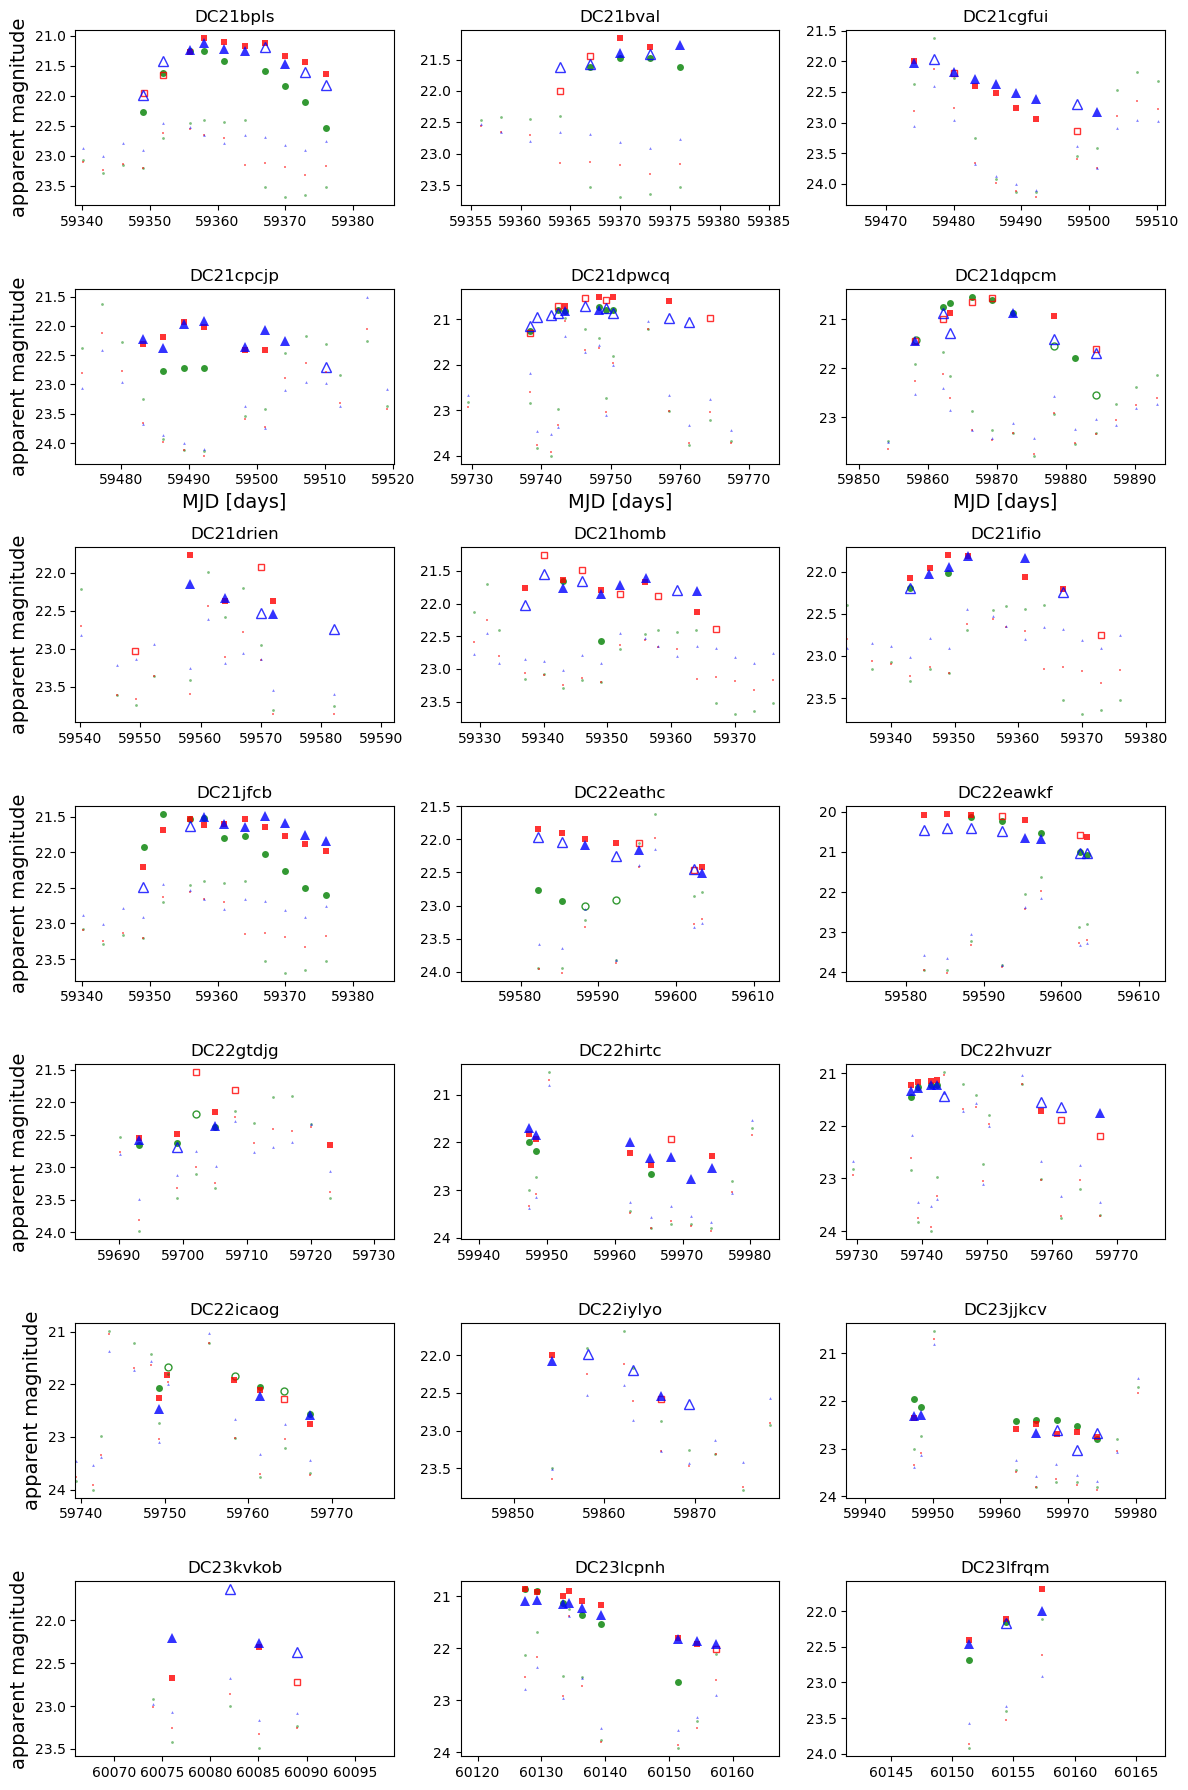

In [15]:
nrow = 7
ncol = 3
fig, ax = plt.subplots( nrow, ncol, figsize=(12, 18), sharex=False, sharey=False )

x = 0
for i in range(nrow):
    ax[i, 0].set_ylabel('apparent magnitude', fontsize=14)
    for j in range(ncol):
        if x < len(pot_FTs):
            cand = pot_FTs[x]

            for f,filt in enumerate(all_filters):
                cx0 = np.where((candLC_candid == cand) & \
                               (candLC_filter == filt) & (candLC_mrb > 0.4))[0]
                cx1 = np.where((candLC_candid == cand) & \
                               (candLC_filter == filt) & (candLC_mrb <= 0.4) & (candLC_lef == 0))[0]
                cx2 = np.where((candLC_candid == cand) & \
                               (candLC_filter == filt) & (candLC_mrb <= 0.4) & (candLC_lef == 1))[0]
                ax[i, j].plot(candLC_mjd[cx0], candLC_mag[cx0], 
                             all_fshapes[f], ms=all_fsizes[f], mew=0, alpha=0.8, color=all_fcolors[f], label=filt)
                ax[i, j].plot(candLC_mjd[cx1], candLC_mag[cx1], 
                             all_fshapes[f], ms=all_fsizes[f], mew=1, alpha=0.8, color='none', mec=all_fcolors[f])
                # ax[i, j].plot(candLC_mjd[cx2], candLC_mag[cx2], 
                #              all_fshapes[f], ms=all_fsizes[f]-1, mew=0, alpha=0.4, color=all_fcolors[f])
                del cx0, cx1, cx2

            # cx = np.where(candLC_candid == cand)[0]
            cx = np.where((candLC_candid == cand) & (candLC_lef == 0))[0]
            xmin = np.min(candLC_mjd[cx]) - 10
            xmax = np.max(candLC_mjd[cx]) + 10
            ax[i, j].invert_yaxis()
            ax[i, j].set_xlim([xmin, xmax])
            ax[i, j].set_title(cand)

            cfield = candLC_field[cx[0]]
            for f,filt in enumerate(all_filters):
                tx = np.where((neml_field == cfield) & (neml_filter == filt)
                              & (neml_mjd > xmin) & (neml_mjd < xmax))[0]
                ax[i, j].plot(neml_mjd[tx], neml_limmag[tx], all_fshapes[f], ms=2, mew=0, alpha=0.5, color=all_fcolors[f])
                del tx

            del cx, xmin, xmax, cfield
            
        x += 1
            
# ax[0, 1].legend(loc='upper right', labelspacing=0.1, handletextpad=0.1, fontsize=14)
for j in range(ncol):
    ax[1, j].set_xlabel('MJD [days]', fontsize=14)

plt.tight_layout()
plt.show()
del nrow, ncol, x

### The four most likely candidates

Of the above 21 candidates, there are four that have limits either before or after their first/last detection,
and a rise and fall that make them potential fast transients.

Redefine the list of potential fast transients.

In [16]:
pot_FTs = np.asarray(['DC21dqpcm', 'DC21ifio', 'DC22icaog', 'DC22iylyo'], dtype='str')

In [17]:
for i, cand in enumerate(pot_FTs):
    tx = np.where(paramLC_candid == cand)[0]
    print('%10s %4.1f %4.1f %4.1f' % (cand, paramLC_thalf_g[tx[0]], paramLC_thalf_r[tx[0]], paramLC_thalf_i[tx[0]]))

 DC21dqpcm 10.1 16.1 20.1
  DC21ifio  6.0 24.0 24.0
 DC22icaog 15.0 15.0 18.0
 DC22iylyo  0.0 12.1 15.1


Plot just the four.

Option to compare with GW170817 KNe from Cowperthwaite, P. S. et al. (find that none are at all declining that fast).

Option to compare with PS1-10bjp from Drout et al. (2014).

In [18]:
fnm = 'old/kn_data/decam_photometry.csv'
kn_mjd = np.loadtxt(fnm, dtype='float', usecols=(0), skiprows=1, delimiter=',')
kn_fil = np.loadtxt(fnm, dtype='str', usecols=(1), skiprows=1, delimiter=',')
kn_mag = np.loadtxt(fnm, dtype='float', usecols=(4), skiprows=1, delimiter=',')

In [19]:
fnm = 'Drout2014_T2_10bjp.txt'
bjp_fil = np.loadtxt(fnm, dtype='str', usecols=(1))
bjp_mjd = np.loadtxt(fnm, dtype='float', usecols=(2))
bjp_mag = np.loadtxt(fnm, dtype='float', usecols=(4))

rx = np.where(bjp_fil == 'r_P1')[0]
tmp = np.argsort(bjp_mag[rx])
bjp_rpeakday = bjp_mjd[rx[tmp[1]]]
bjp_rpeakmag = bjp_mag[rx[tmp[1]]]
print(bjp_rpeakday, bjp_rpeakmag)
del rx, tmp

55446.6 20.55


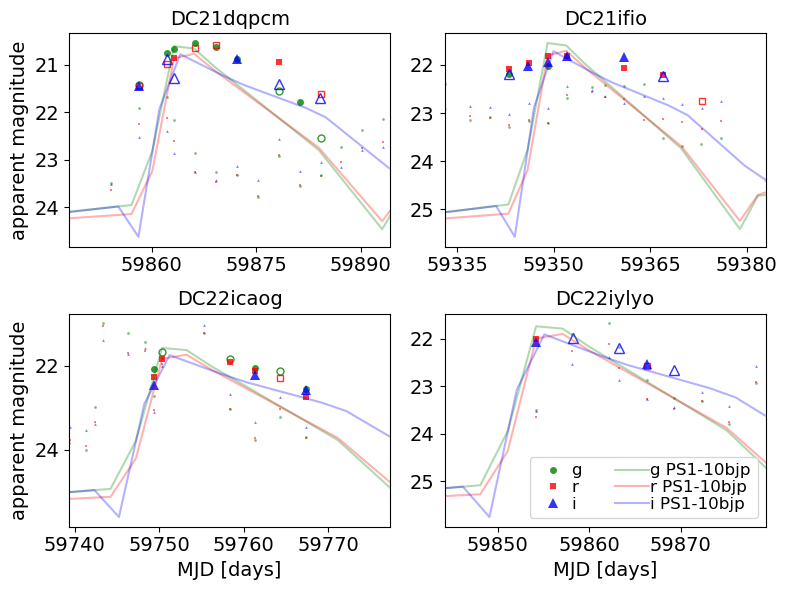

In [20]:
nrow = 2
ncol = 2
fig, ax = plt.subplots( nrow, ncol, figsize=(8, 6), sharex=False, sharey=False )

x = 0
for i in range(nrow):
    ax[i, 0].set_ylabel('apparent magnitude', fontsize=14)
    for j in range(ncol):
        if x < len(pot_FTs):
            cand = pot_FTs[x]
                
            ### plot the candidate light curve
            for f,filt in enumerate(all_filters):
                cx0 = np.where((candLC_candid == cand) & \
                               (candLC_filter == filt) & (candLC_mrb > 0.4))[0]
                cx1 = np.where((candLC_candid == cand) & \
                               (candLC_filter == filt) & (candLC_mrb <= 0.4) & (candLC_lef == 0))[0]
                cx2 = np.where((candLC_candid == cand) & \
                               (candLC_filter == filt) & (candLC_mrb <= 0.4) & (candLC_lef == 1))[0]
                ax[i, j].plot(candLC_mjd[cx0], candLC_mag[cx0], 
                             all_fshapes[f], ms=all_fsizes[f], mew=0, alpha=0.8, color=all_fcolors[f], label=filt)
                ax[i, j].plot(candLC_mjd[cx1], candLC_mag[cx1], 
                             all_fshapes[f], ms=all_fsizes[f], mew=1, alpha=0.8, color='none', mec=all_fcolors[f])
                # ax[i, j].plot(candLC_mjd[cx2], candLC_mag[cx2], 
                #              all_fshapes[f], ms=all_fsizes[f]-1, mew=0, alpha=0.4, color=all_fcolors[f])
                if filt == 'r':
                    tmp = np.argmin(candLC_mag[cx0])
                    rpeakday = candLC_mjd[cx0[tmp]]
                    rpeakmag = candLC_mag[cx0[tmp]]
                    del tmp
                del cx0, cx1, cx2
            
            ### set plot parameters
            # cx = np.where(candLC_candid == cand)[0]
            cx = np.where((candLC_candid == cand) & (candLC_lef == 0))[0]
            xmin = np.min(candLC_mjd[cx]) - 10
            xmax = np.max(candLC_mjd[cx]) + 10
            ax[i, j].invert_yaxis()
            ax[i, j].set_xlim([xmin, xmax])
            ax[i, j].set_title(cand, fontsize=14)
            ax[i, j].xaxis.set_major_locator(plt.MaxNLocator(4))
            ax[i, j].tick_params(axis='both', which='major', labelsize=14)

            ### plot the nightly epoch limiting magnitudes
            cfield = candLC_field[cx[0]]
            for f,filt in enumerate(all_filters):
                tx = np.where((neml_field == cfield) & (neml_filter == filt)
                              & (neml_mjd > xmin) & (neml_mjd < xmax))[0]
                ax[i, j].plot(neml_mjd[tx], neml_limmag[tx], all_fshapes[f], ms=2, mew=0, alpha=0.5, color=all_fcolors[f])
                del tx
            del cx, xmin, xmax, cfield
            
            ### overplot the KNe from GW170817
            # cx = np.where(paramLC_candid == cand)[0]
            # toff = paramLC_t0[cx[0]] - 57983
            # moff = paramLC_minmag[cx[0]] - 18
            # for f,filt in enumerate(all_filters):
            #     fx = np.where(kn_fil == filt)[0]
            #     ax[i, j].plot(kn_mjd[fx] + toff, kn_mag[fx] + moff, all_fshapes[f], 
            #                   alpha=0.5, ms=2, ls='solid', color=all_fcolors[f])
            
            ### overplot PS1-10bjp by aligning the r-band peak
            cx = np.where(paramLC_candid == cand)[0]
            toff = rpeakday - bjp_rpeakday
            moff = rpeakmag - bjp_rpeakmag
            for f,filt in enumerate(all_filters):
                fx = np.where(bjp_fil == filt+'_P1')[0]
                ax[i, j].plot(bjp_mjd[fx] + toff, bjp_mag[fx] + moff, all_fshapes[f], 
                              alpha=0.3, ms=0, ls='solid', color=all_fcolors[f], label=filt+' PS1-10bjp')
            
            del cx, toff, moff
            del rpeakday, rpeakmag
            
        x += 1
            
ax[1, 1].legend(loc='best', labelspacing=0.1, handletextpad=0.1, fontsize=12, ncol=2)
for j in range(ncol):
    ax[1, j].set_xlabel('MJD [days]', fontsize=14)

plt.tight_layout()
plt.savefig('plots/potential_FTs.png')
plt.show()
del nrow, ncol, x

### Static-sky cross matches

Are they cross matched to stars or galaxies?

Recall the following meanings 

`flagstar` : 1 if matched to a star; 0 if matched to a galaxy; -1 if unmatched (int) 

`flagcore` : 1 if matched to the core of the galaxy; 0 otherwise (int) 

`flagmatch` : 1 if a star AND galaxy met constraints; 0 if one or the other; -1 if unmatched (int) 

In [21]:
print('           fs fc fm')
for i, cand in enumerate(pot_FTs):
    ix = np.where(lsdr10xm_candid == cand)[0]
    print('%10s  %1i  %1i  %1i' % (cand, lsdr10xm_flagstar[ix[0]], lsdr10xm_flagcore[ix[0]], lsdr10xm_flagmatch[ix[0]]))
    del ix

           fs fc fm
 DC21dqpcm  0  0  0
  DC21ifio  0  1  0
 DC22icaog  0  1  0
 DC22iylyo  0  1  0


None are matched to stars, but 4 are in the cores of their potential host galaxies.

In [22]:
for i, cand in enumerate(pot_FTs):
    ix = np.where(link_candid == cand)[0]
    print(cand, link_lsview[ix[0]])
    del ix

DC21dqpcm https://www.legacysurvey.org/viewer/cutout.jpg?ra=8.25201798848051&dec=-42.8759021333855&layer=ls-dr9&pixscale=0.06
DC21ifio https://www.legacysurvey.org/viewer/cutout.jpg?ra=151.01380327484&dec=1.79591704279873&layer=ls-dr9&pixscale=0.06
DC22icaog https://www.legacysurvey.org/viewer/cutout.jpg?ra=8.56951878854105&dec=-43.2991451116652&layer=ls-dr9&pixscale=0.06
DC22iylyo https://www.legacysurvey.org/viewer/cutout.jpg?ra=9.96713768620159&dec=-44.2376925401728&layer=ls-dr9&pixscale=0.06


In [23]:
for i, cand in enumerate(pot_FTs):
    ix = np.where(lsdr10xm_candid == cand)[0]
    print('%10s %6.3f %6.3f' % (cand, lsdr10xm_meanpz[ix[0]], lsdr10xm_specz[ix[0]]))
    del ix

 DC21dqpcm  0.185  0.178
  DC21ifio  0.335 -99.000
 DC22icaog  0.250 -99.000
 DC22iylyo  0.486 -99.000


In [24]:
for i, cand in enumerate(pot_FTs):
    ix = np.where(lsdr10xm_candid == cand)[0]
    pz = lsdr10xm_meanpz[ix[0]]
    if pz > 0.0:
        px = np.where(paramLC_candid == cand)[0]
        dm = 5. * np.log10(cosmo.luminosity_distance(pz).value) + 25.
        mg = paramLC_minmag_g[px[0]]
        mr = paramLC_minmag_r[px[0]]
        mi = paramLC_minmag_i[px[0]]
        ag = mg - dm
        ar = mr - dm
        ai = mi - dm
        print('%10s %5.2f %5.2f %5.2f %5.2f %5.2f %5.2f' % (cand, mg, mr, mi, ag, ar, ai))

 DC21dqpcm 20.54 20.57 20.87 -19.23 -19.19 -18.90
  DC21ifio 22.02 21.81 21.82 -19.22 -19.43 -19.41
 DC22icaog 21.68 21.83 22.23 -18.83 -18.67 -18.28
 DC22iylyo  0.00 22.00 21.99 -42.19 -20.19 -20.20
